# KMeans

KMeans is a clustering algorithm that partitions a given dataset into `K` clusters,
where each data point belongs to the cluster whose centroid is closest to it. The
algorithm tries to minimize the sum of squared distances between data points and
their respective cluster centroids, which is also known as the
`Within-Cluster-Sum-of-Squares (WCSS)` metric. The algorithm is iterative and starts by
 randomly selecting K initial centroids, then repeatedly assigning data points to the
  nearest centroid, updating the centroid of each cluster, and re-assigning data
  points to the new nearest centroid. This process continues until the algorithm
  converges, meaning that the centroids no longer move.

In [75]:
import warnings
warnings.filterwarnings('ignore')

# Set up notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

home_directory = "C:/Users/rober/DataspellProjects/Machine-Learning-Sandbox"

operators = pd.read_csv(
    filepath_or_buffer=home_directory + "/data/08_rainbow_six/players_rainbow_six.csv"
)

## Data Preparation

Before training a KMeans model, it's necessary to prepare the data by scaling it and
selecting the appropriate features. Scikit-learn provides a `StandardScaler` class that
 can be used to scale the data to zero mean and unit variance. It's also important to
  select the features that will be used to train the model.

In [76]:
# Features (numpy arrays)
X = operators[["time_played", "kills", "deaths", "wins", "losess"]].values
# Target variable (numpy arrays)
y = operators[["xp"]].values


# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
X_scaled = scaler.fit_transform(X)

# Normalize
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
X_normalized = normalizer.fit_transform(X)

# MaxAbsScale
from sklearn.preprocessing import MaxAbsScaler
maxAbsScaler = MaxAbsScaler()
X_normalized = maxAbsScaler.fit_transform(X)


## Model Training

To train a KMeans model, we first need to instantiate the `KMeans` class from
scikit-learn, and specify the number of clusters (`n_clusters`) and other
hyperparameters. In this example, we'll use `n_clusters=3` since we know that there are
 3 clusters in the dataset. We'll also set `random_state=42` to ensure reproducibility
 of results. Then, we fit the model to the scaled data using the `fit` method.

In [77]:
# Train KMeans model
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

Now let's plot the labels

In [78]:
labels = kmeans.predict(X_scaled)
print(labels)

[2 2 2 ... 0 1 0]


We can also visualize the clusters using a scatter
plot. In this example, we'll use the `matplotlib` library to create a scatter plot of
the data points, colored by their assigned cluster.

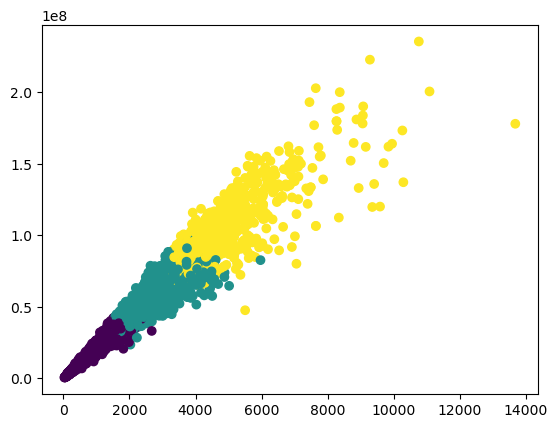

In [79]:
import matplotlib.pyplot as plt
xs = operators["wins"]
ys = operators["xp"]
plt.scatter(xs, ys, c=labels)
plt.show()

Now let's plot the centroids.

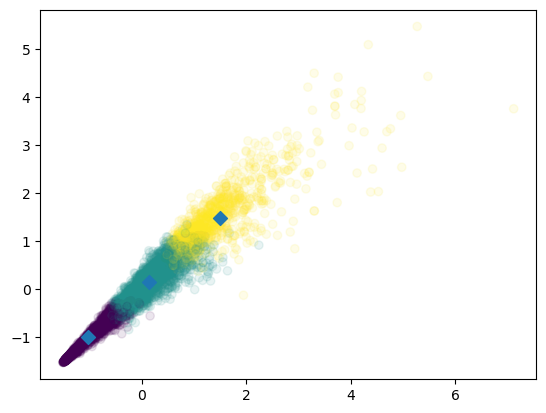

In [80]:
# Assign the cluster centers: centroids
centroids = kmeans.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# First scatter plot
xs = scaler.fit_transform(operators["wins"].values.reshape(-1, 1))
ys = scaler.fit_transform(operators["xp"].values.reshape(-1, 1))
plt.scatter(xs, ys, c=labels, alpha=0.1)

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker='D', s=50)
plt.show()

## Model Evaluation

To evaluate the performance of the KMeans model, we can use the WCSS metric.
Scikit-learn provides the `inertia_` (measures how far the samples are from their
centroids) attribute of the `KMeans` class, which returns the `WCSS` value of the
trained model.

To evaluate the performance of the KMeans model, we can use also the `silhouette_score`
 (a measure of how well each data point fits into its assigned cluster), or the
 `homogeneity_score` (a measure of how well each cluster contains only data points from
  a single class).

In [81]:
from sklearn.metrics import silhouette_score, homogeneity_score

inertia = kmeans.inertia_
silhouette = silhouette_score(X_scaled, kmeans.labels_)
# homogeneity = homogeneity_score(target, kmeans.labels_) # works if we have a
# categorical variable to compare the clusters

print(f"Inertia: {inertia:.2f}")
print(f"Silhouette Score: {silhouette:.2f}")
#print(f"Homogeneity Score: {homogeneity:.2f}")

Inertia: 5280.54
Silhouette Score: 0.50


### Cluster selection

This is a tradeoff, we have to select the number of cluster that gives the lowest
inertia, but at the same time we have to select the less amount of clusters to gain
cluster explainability.

For the selection, we can use an **elbow plot**, to select where the inertia begins to
decrease more slowly.

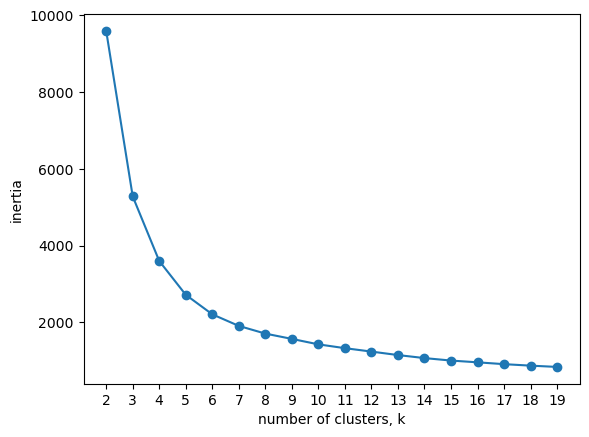

In [82]:
ks = range(2, 20)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k, random_state=42)

    # Fit model to samples
    model.fit(X_scaled)

    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

## Hyperparameter Tuning

We can tune the hyperparameters of the KMeans model using a `GridSearchCV` or a
`RandomizedSearchCV` to find the best combination of hyperparameters that yields the
best performance.

In [83]:
from sklearn.model_selection import GridSearchCV

params = {
    "n_clusters": [2, 3, 4, 5],
    "init": ["k-means++", "random"],
    "max_iter": [100, 200, 300],
    "tol": [0.0001, 0.001, 0.01]
}

grid_search = GridSearchCV(KMeans(random_state=42), param_grid=params, cv=5)
grid_search.fit(X_scaled)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score:.2f}")

Best Parameters: {'init': 'random', 'max_iter': 100, 'n_clusters': 5, 'tol': 0.001}
Best Score: -566.54


## References

